# Effectuez une classification hiérarchique - Exemple avec le dataset Iris

# Preliminary

## 1.1 Context

Ce notebook est en lien le chapitre l'activité Effectuez une classification hiérarchique

Nous allons travailler sur le jeu de données iris.

## 1.2 Imports

Importons les librairies : 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')  # code optionnel

## 1.3 Graphics

Chargeons les librairies graphiques :

In [4]:
sns.set()

## 1.4 Data

Chargeons les données. Nous utiliserons le dataframe iris, directement présent dans `scikit-learn`. 

Il faudra travailler un peu pour pouvoir l'utiliser correctement. Ne pretez pas trop attention aux lignes ci dessous.

In [5]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = [i.split('(')[0].replace(" ", "_")[:-1] for i in df.columns]
X=df.copy()
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 2. About ACH 

Effectuons une classification hiérarchique ascendante.

## 2.1 Compute linkage

Nous allons calculer les distances en spécifiant la méthode à utiliser:

In [6]:
Z = linkage(X, method="ward")
pd.DataFrame(Z)

,0,1,2,3
0,101.0,142.0,0.000000,2.0
1,7.0,39.0,0.100000,2.0
2,0.0,17.0,0.100000,2.0
3,9.0,34.0,0.100000,2.0
4,128.0,132.0,0.100000,2.0
...,...,...,...,...
144,282.0,290.0,3.828053,50.0
145,287.0,288.0,4.847709,36.0
146,292.0,293.0,6.399407,64.0
147,295.0,296.0,12.300396,100.0


## 2.2 Dendrograms

Nous pouvons désormais afficher le dendrogramme: 

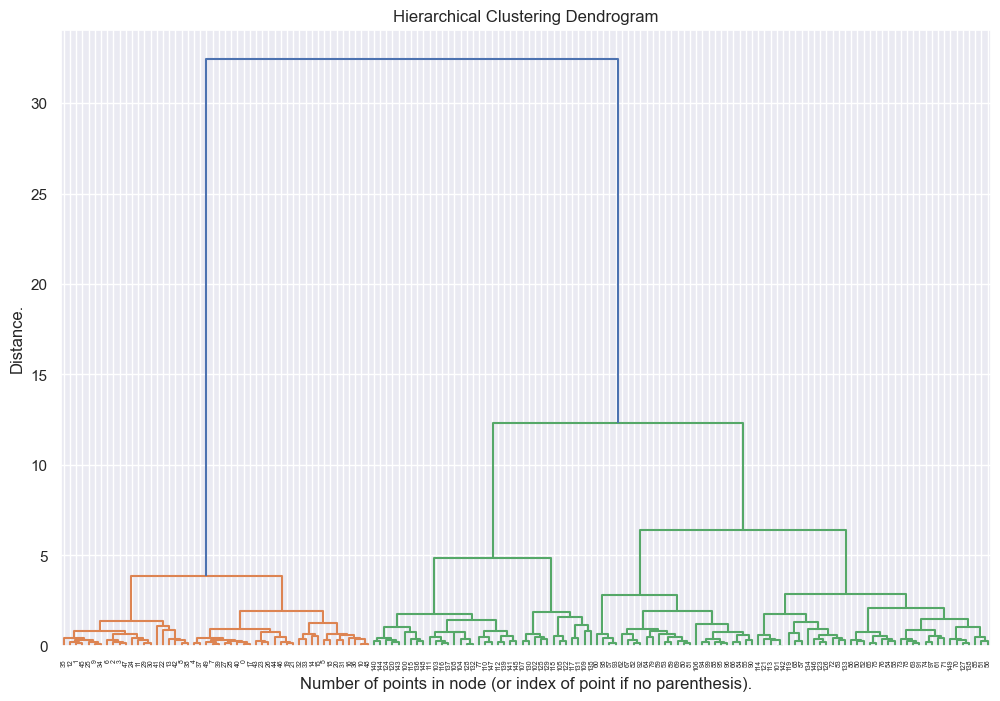

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

Le dendrogramme semble pertinent mais sa profondeur le rend illisible.

On peut jouer sur différents paramètres pour obtenir un dendrogramme plus lisible :

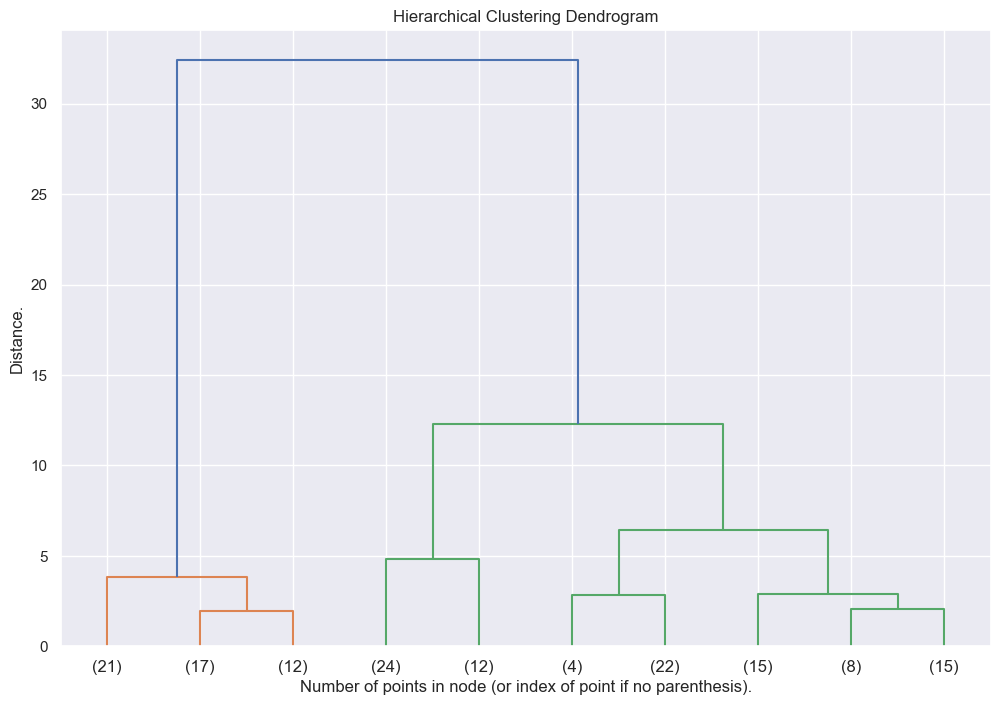

In [8]:
# les arguments p=10, truncate_mode="lastp" signifient que l'on ne va afficher que 10 clusters

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=10, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

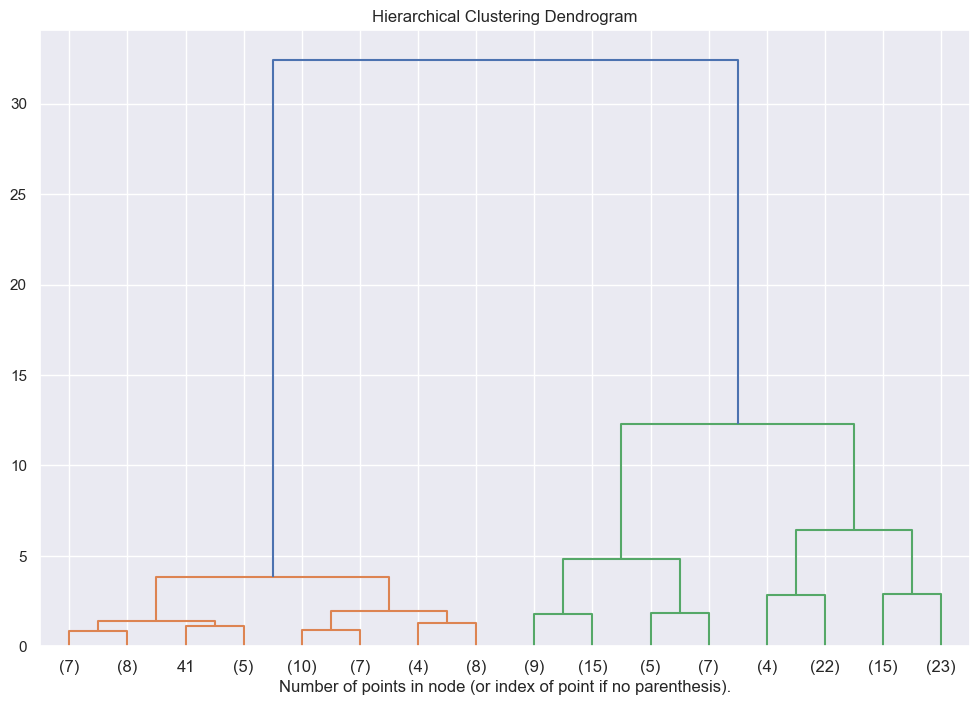

In [9]:
#  les arguments p=3, truncate_mode="level"signifient que l'on ne va afficher que les clusters issus de 3 noeuds.

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=3, truncate_mode="level", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## 2.3 Clusters

Pour définir les clusters, on peut utiliser `scipy` ou `scikit-learn`.

### 2.3.1 Scikit-Learn

On instancie un estimateur : 

In [10]:
cah = AgglomerativeClustering(n_clusters=3, linkage="ward")

On entraine l'estimateur : 

In [11]:
cah.fit(X)

AgglomerativeClustering(n_clusters=3)

Regardons nos clusters : 

In [12]:
cah.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

-- **ATTENTION** --  
Ici, `0`,`1`,`2` est à considérer comme une variable catégorielle cardinale. Il n'y a pas d'ordre entre les clusters.

Le cluster `0` n'est pas *supérieur* au cluster `1` par exemple. Considérez que c'est plus un *id* qu'une *valeur*. 






Pour être plus clair, nous allons utiliser des lettres plutôt que des nombres: 


In [13]:
dd = {i:j for i,j in enumerate(list("abc"))}
labels = [dd[i] for i in cah.labels_]
labels[:10]

['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']

Disons que c'est plus clair maintenant...


Ajoutons nos labels à `X`

In [14]:
X["cluster"] = labels
X.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,b
1,4.9,3.0,1.4,0.2,b
2,4.7,3.2,1.3,0.2,b
3,4.6,3.1,1.5,0.2,b
4,5.0,3.6,1.4,0.2,b


Observons nos clusters: 

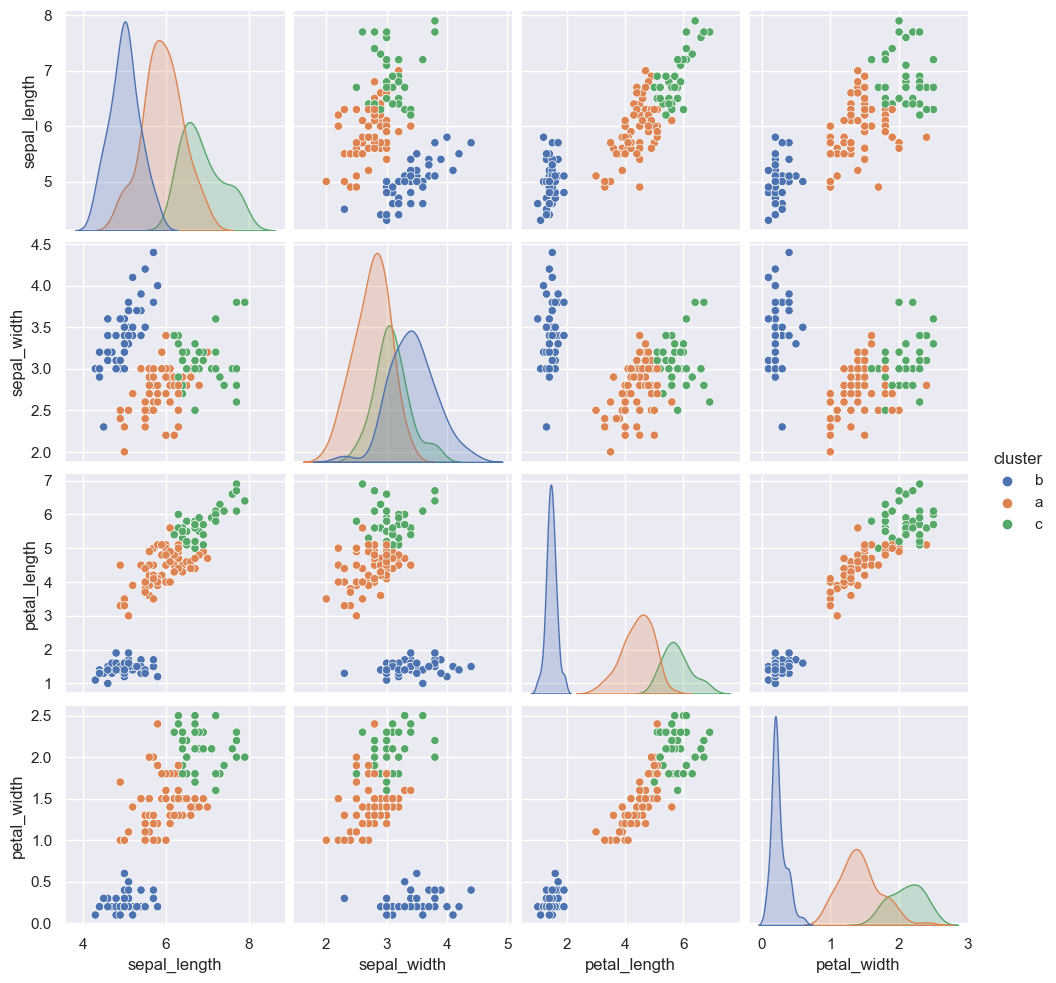

In [15]:
sns.pairplot(X, hue="cluster")

### 2.3.2 Scipy

Pour faire la même chose avec `scipy`, il suffit de prendre notre `Z` :

In [16]:
Z[:10]

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00]])

Ensuite on défini le nombre de clusters que l'on souhaite:

In [17]:
k=3

On applique ensuite la fonction `fclusters`de `scipy`pour définir les clusters : 

In [18]:
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

Ensuite on peut faire les représentations graphiques comme avec `scikit-learn`!

- ATTENTION

Ici, 0,1,2 est à considérer comme une variable catégorielle cardinale. Il n'y a pas d'ordre entre les clusters.

Le cluster 0 n'est pas supérieur au cluster 1 par exemple. Considérez que c'est plus un id qu'une valeur.

Pour être plus clair, nous allons utiliser des lettres plutôt que des nombres:

In [19]:
dd = {i:j for i,j in enumerate(list("abc"))}
labels = [dd[i] for i in cah.labels_]
labels[:10]

['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']

Disons que c'est plus clair maintenant...

Ajoutons nos labels à X

In [20]:
X["cluster"] = labels
X.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,b
1,4.9,3.0,1.4,0.2,b
2,4.7,3.2,1.3,0.2,b
3,4.6,3.1,1.5,0.2,b
4,5.0,3.6,1.4,0.2,b


Observons nos clusters:

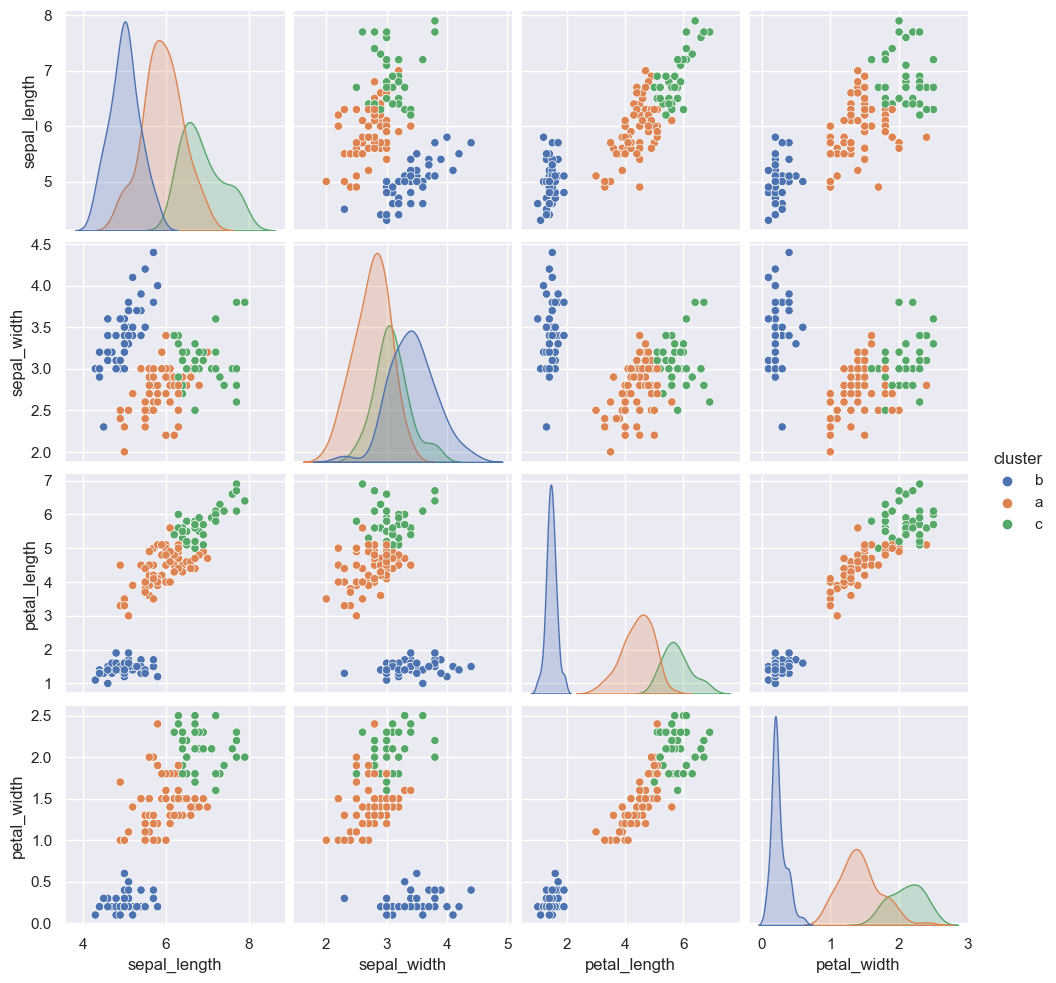

In [21]:
sns.pairplot(X, hue="cluster")